In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_pass_types = 'https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats'

In [4]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,825,...,44.7,1,0.9,+0.1,13,39,29,7,79,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,921,...,64.4,0,0.2,-0.2,6,57,4,0,58,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,1322,...,85.0,0,0.9,-0.9,10,61,5,0,56,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,944,...,67.0,2,2.0,0.0,17,89,15,6,88,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,2,...,NaN,0,0.0,0.0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,2786,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,769,...,71.9,1,0.4,+0.6,9,67,7,1,61,Matches
2897,2787,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,537,...,68.2,1,1.2,-0.2,18,42,16,2,53,Matches
2898,2788,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,822,...,66.2,3,4.2,-1.2,44,53,43,2,103,Matches
2899,2789,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,236,...,80.0,2,1.4,+0.6,11,16,1,0,17,Matches


In [5]:
data_pass_types = pd.read_html(url_pass_types, header=1)[0]
data_pass_types = data_pass_types[data_pass_types['Player'] != 'Player']
data_pass_types

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Att,...,Right,Head,TI,Other,Cmp,Off,Out.1,Int,Blocks,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,1095,...,691,23,247,2,825,6,20,35,42,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,1117,...,287,36,12,3,921,2,21,32,22,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,1435,...,1249,40,2,8,1322,2,18,26,18,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,1158,...,1034,15,4,1,944,6,14,37,44,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,6,...,0,0,0,0,2,0,0,2,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,2786,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,897,...,648,32,0,6,769,5,14,22,17,Matches
2897,2787,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,653,...,515,11,3,2,537,1,10,16,21,Matches
2898,2788,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,982,...,81,18,4,6,822,6,10,35,19,Matches
2899,2789,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,392,...,128,70,1,31,236,1,3,23,7,Matches


In [6]:
data_passing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2790 entries, 0 to 2900
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rk       2790 non-null   object
 1   Player   2790 non-null   object
 2   Nation   2788 non-null   object
 3   Pos      2790 non-null   object
 4   Squad    2790 non-null   object
 5   Comp     2790 non-null   object
 6   Age      2788 non-null   object
 7   Born     2788 non-null   object
 8   90s      2790 non-null   object
 9   Cmp      2790 non-null   object
 10  Att      2790 non-null   object
 11  Cmp%     2776 non-null   object
 12  TotDist  2790 non-null   object
 13  PrgDist  2790 non-null   object
 14  Cmp.1    2790 non-null   object
 15  Att.1    2790 non-null   object
 16  Cmp%.1   2748 non-null   object
 17  Cmp.2    2790 non-null   object
 18  Att.2    2790 non-null   object
 19  Cmp%.2   2727 non-null   object
 20  Cmp.3    2790 non-null   object
 21  Att.3    2790 non-null   object
 22  

In [7]:
d = data_passing[['Player', '90s', 'Cmp', 'PrgDist', 'Ast', 'xA', 'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']]

In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
player_data = pd.merge(player_position, d, on="Player")
player_data.drop_duplicates(inplace=True)
player_data.iloc[:, 3:] = player_data.iloc[:, 3:].astype(float)

In [10]:
player_data

,S. No.,Player,Position,90s,Cmp,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,4,Yunis Abdelhamid,Centre-Back,23.1,921.0,6813.0,0.0,0.2,-0.2,6.0,57.0,4.0,0.0,58.0
1,7,Laurent Abergel,Defensive Midfield,23.2,944.0,4713.0,2.0,2.0,0.0,17.0,89.0,15.0,6.0,88.0
2,8,Charles Abi,Centre-Forward,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Matthis Abline,Centre-Forward,1.1,8.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,12,Tammy Abraham,Centre-Forward,25.5,392.0,1462.0,3.0,3.1,-0.1,28.0,27.0,22.0,3.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2817,Kurt Zouma,Centre-Back,15.8,518.0,3111.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,23.0
1980,2818,Igor Zubeldia,Defensive Midfield,10.8,539.0,3098.0,1.0,0.0,1.0,0.0,31.0,1.0,0.0,16.0
1981,2820,Martín Zubimendi,Defensive Midfield,18.3,769.0,3653.0,1.0,0.4,0.6,9.0,67.0,7.0,1.0,61.0
1982,2822,Martin Ødegaard,Attacking Midfield,18.3,822.0,3262.0,3.0,4.2,-1.2,44.0,53.0,43.0,2.0,103.0


C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

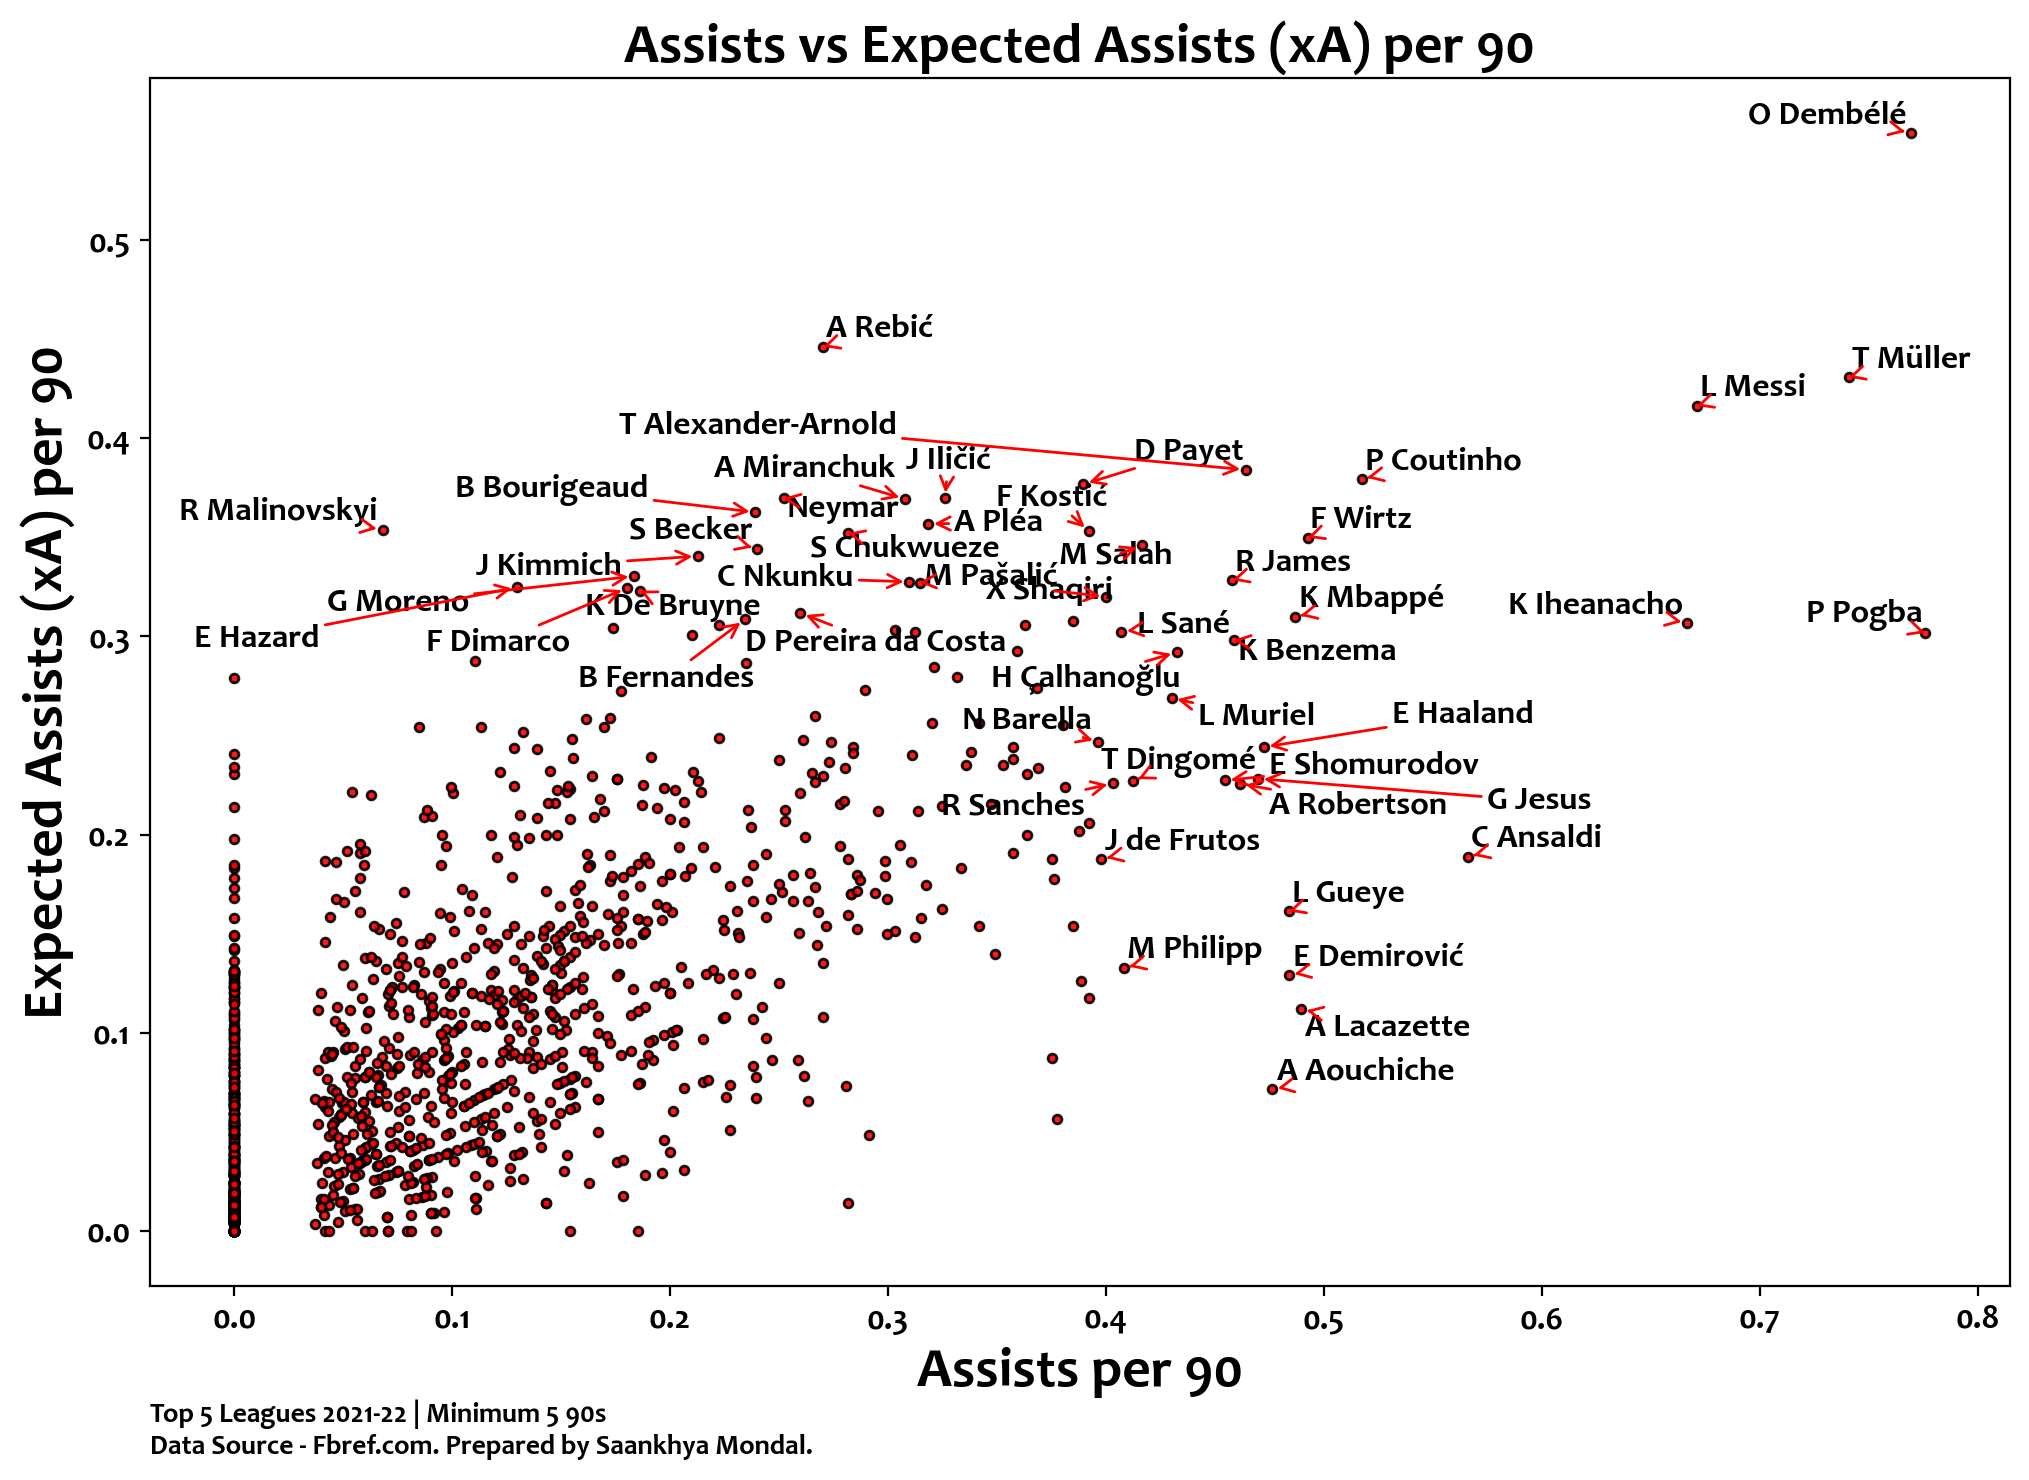

In [11]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['Astp90'] = data['Ast']/data['90s']
data['xAp90'] = data['xA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xAp90'].quantile(0.980)
outlier_bottom = data['xAp90'].quantile(0.03)
outlier_right = data['Astp90'].quantile(0.980)
outlier_left = data['Astp90'].quantile(0.03)

par_x = list(data['Astp90'].astype(float))
par_y = list(data['xAp90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Assists per 90', fontsize=20)
ax.set_ylabel('Expected Assists (xA) per 90', fontsize=20)
ax.set_title('Assists vs Expected Assists (xA) per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [12]:
fig.savefig('Images/AvsxAp90.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

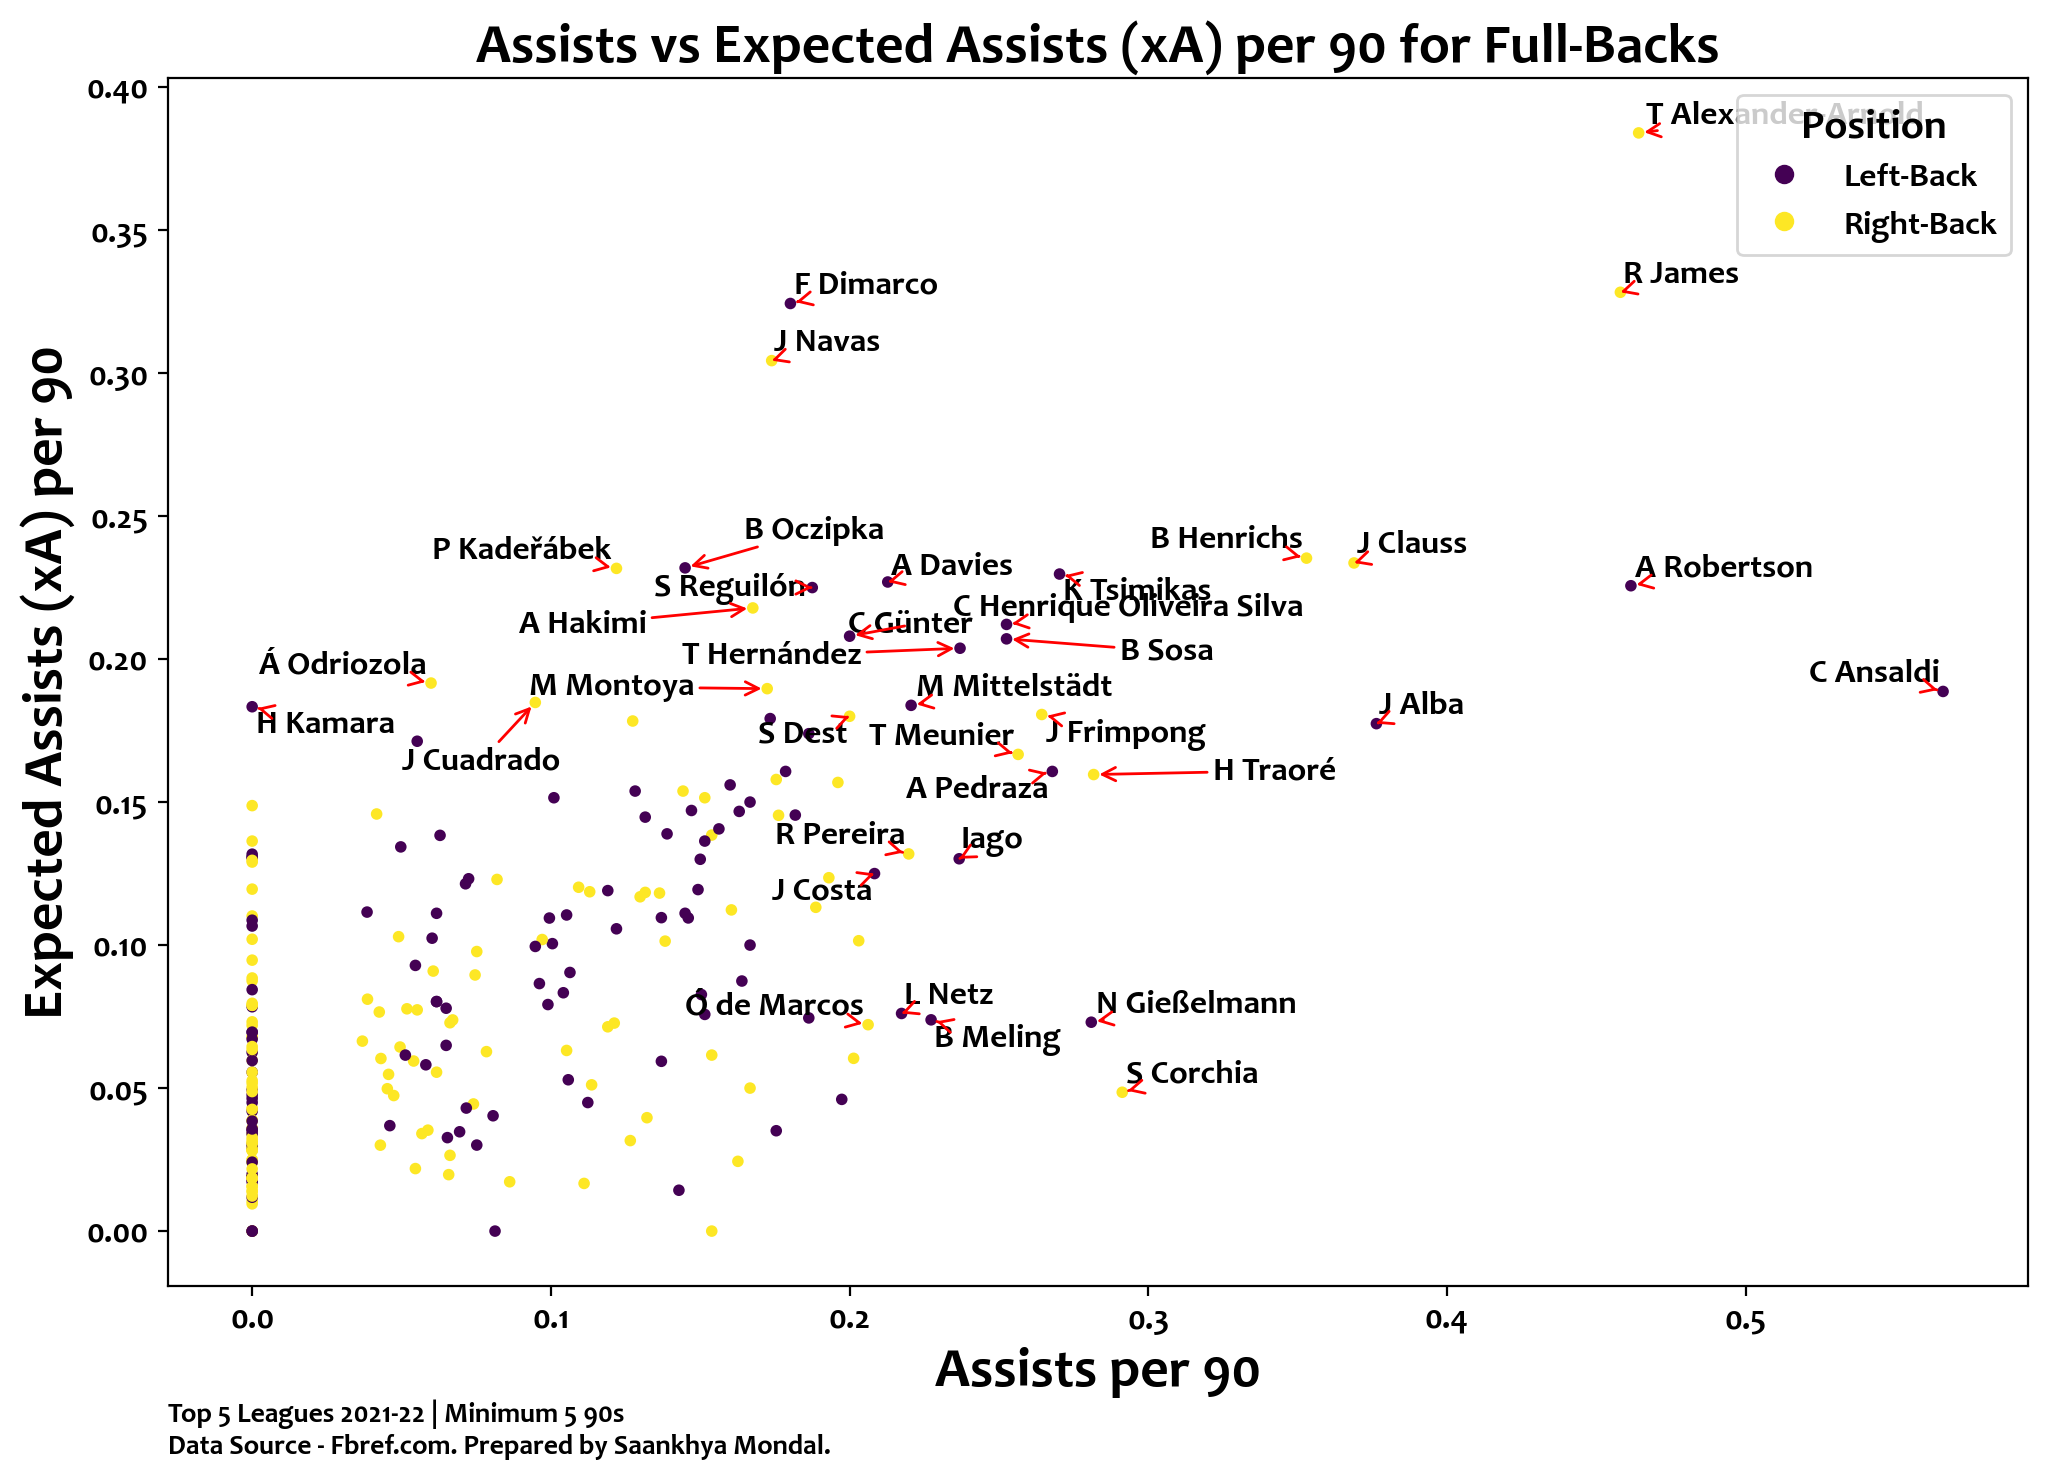

In [13]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data['Astp90'] = data['Ast']/data['90s']
data['xAp90'] = data['xA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xAp90'].quantile(0.900)
outlier_bottom = data['xAp90'].quantile(0.03)
outlier_right = data['Astp90'].quantile(0.900)
outlier_left = data['Astp90'].quantile(0.03)

par_x = list(data['Astp90'].astype(float))
par_y = list(data['xAp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Assists per 90', fontsize=20)
ax.set_ylabel('Expected Assists (xA) per 90', fontsize=20)
ax.set_title('Assists vs Expected Assists (xA) per 90 for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [14]:
fig.savefig('Images/AvsxAp90_FB.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

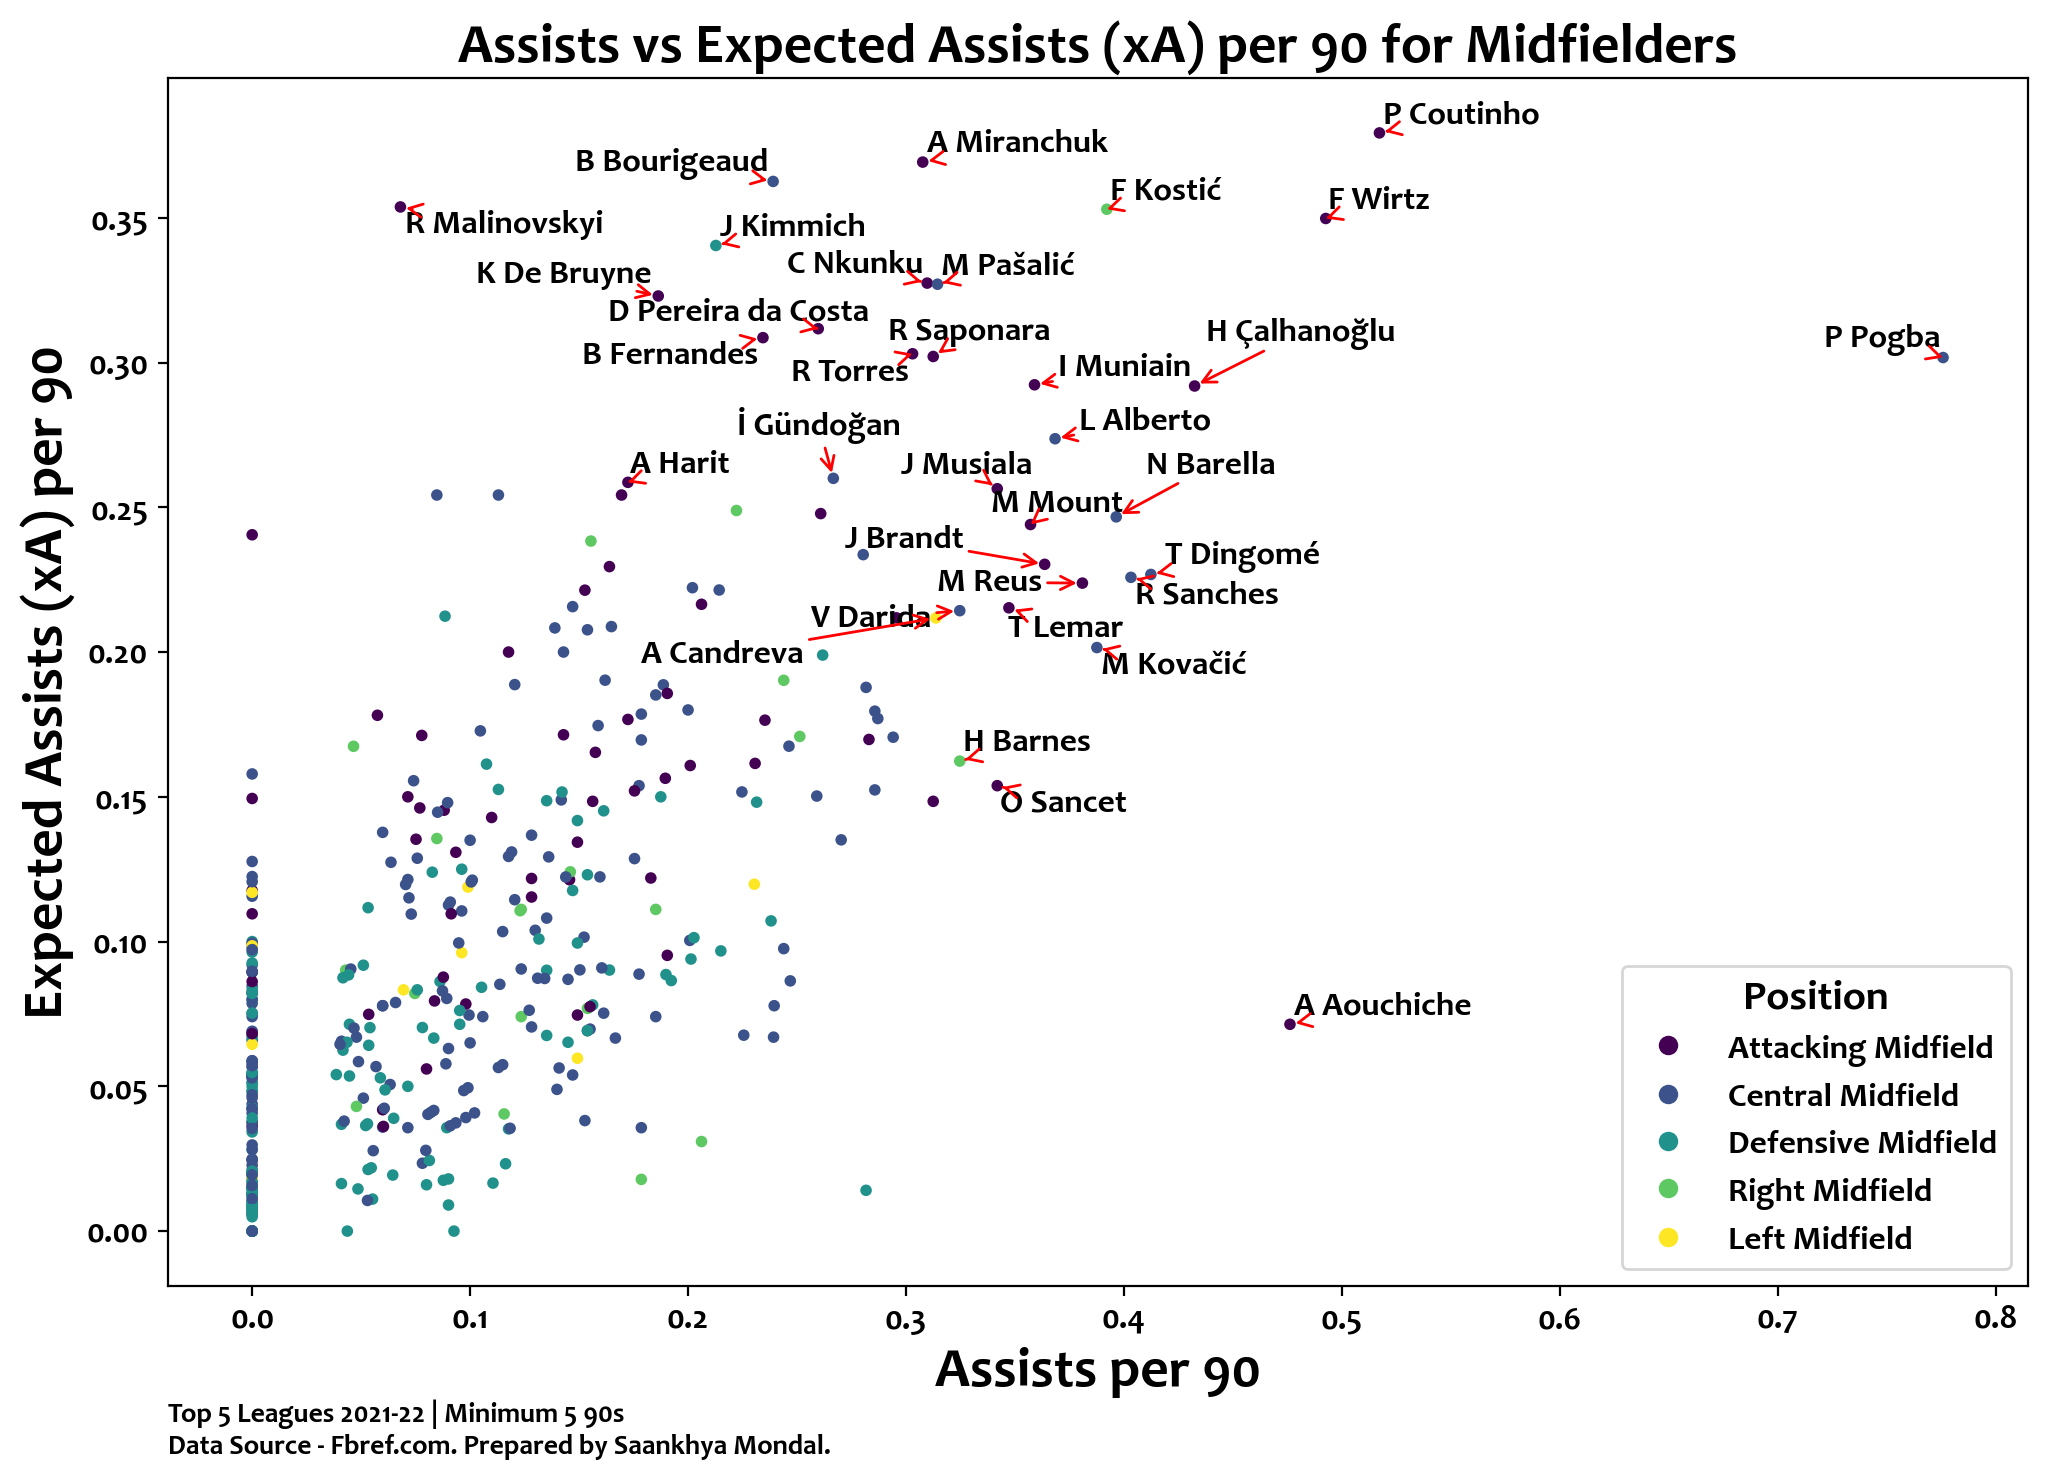

In [15]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Attacking Midfield', 'Central Midfield', 'Defensive Midfield', 'Right Midfield', 'Left Midfield']
data = data[data['Position'].apply(lambda x: x in who)]
data['Astp90'] = data['Ast']/data['90s']
data['xAp90'] = data['xA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xAp90'].quantile(0.950)
outlier_bottom = data['xAp90'].quantile(0.03)
outlier_right = data['Astp90'].quantile(0.950)
outlier_left = data['Astp90'].quantile(0.03)

par_x = list(data['Astp90'].astype(float))
par_y = list(data['xAp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Assists per 90', fontsize=20)
ax.set_ylabel('Expected Assists (xA) per 90', fontsize=20)
ax.set_title('Assists vs Expected Assists (xA) per 90 for Midfielders', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

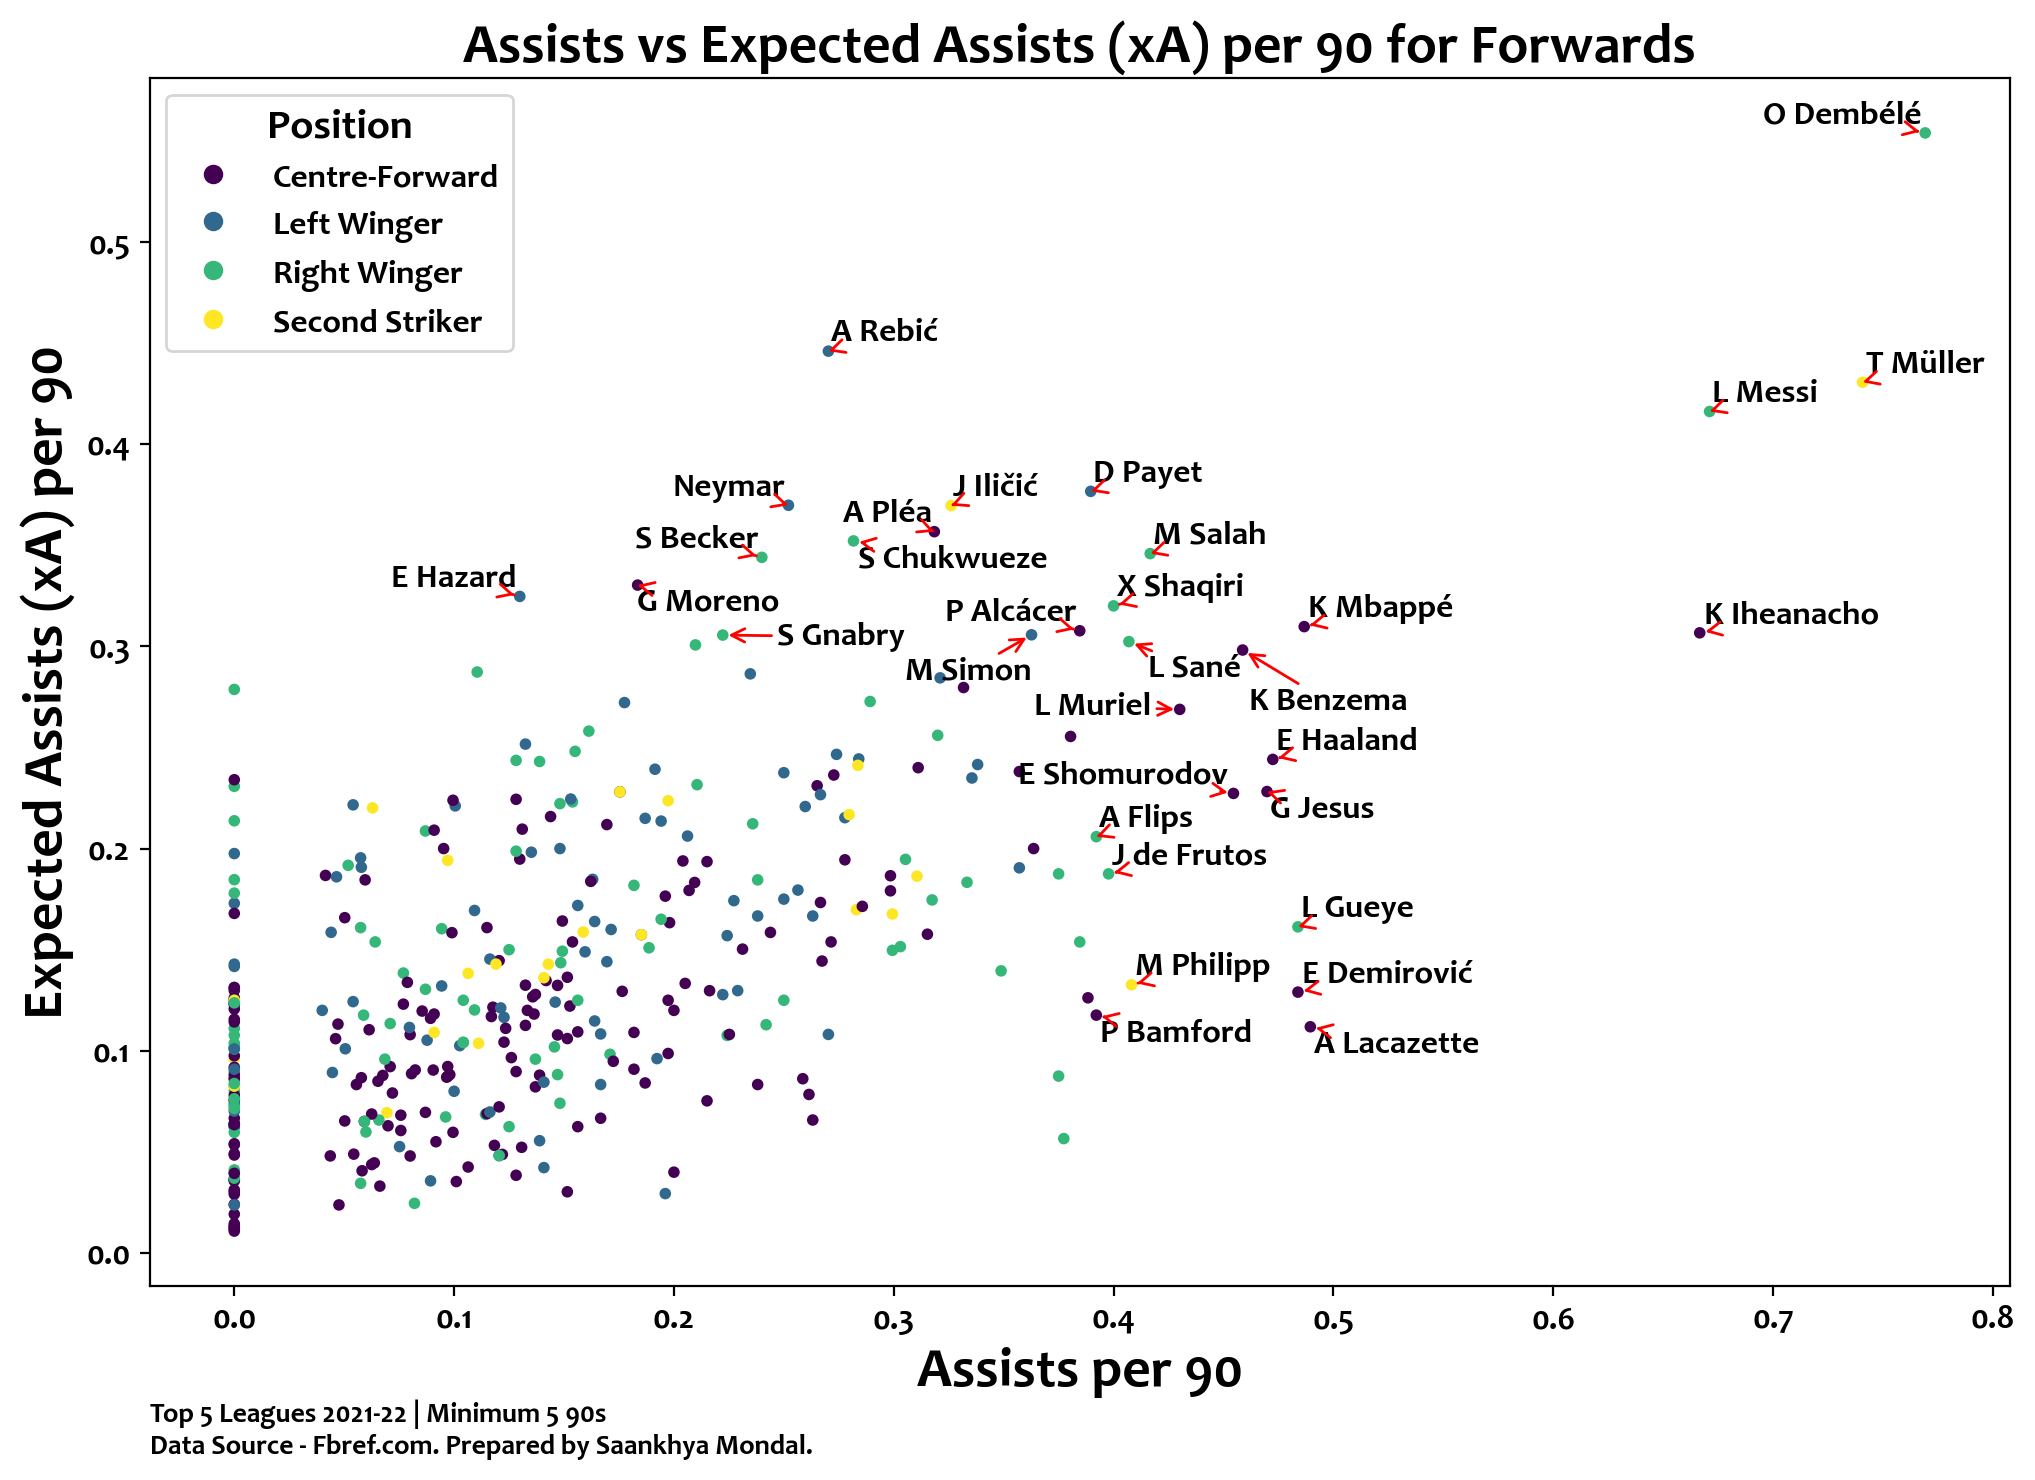

In [16]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Centre-Forward', 'Left Winger', 'Right Winger', 'Second Striker']
data = data[data['Position'].apply(lambda x: x in who)]
data['Astp90'] = data['Ast']/data['90s']
data['xAp90'] = data['xA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xAp90'].quantile(0.950)
outlier_bottom = data['xAp90'].quantile(0.03)
outlier_right = data['Astp90'].quantile(0.950)
outlier_left = data['Astp90'].quantile(0.03)

par_x = list(data['Astp90'].astype(float))
par_y = list(data['xAp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Assists per 90', fontsize=20)
ax.set_ylabel('Expected Assists (xA) per 90', fontsize=20)
ax.set_title('Assists vs Expected Assists (xA) per 90 for Forwards', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

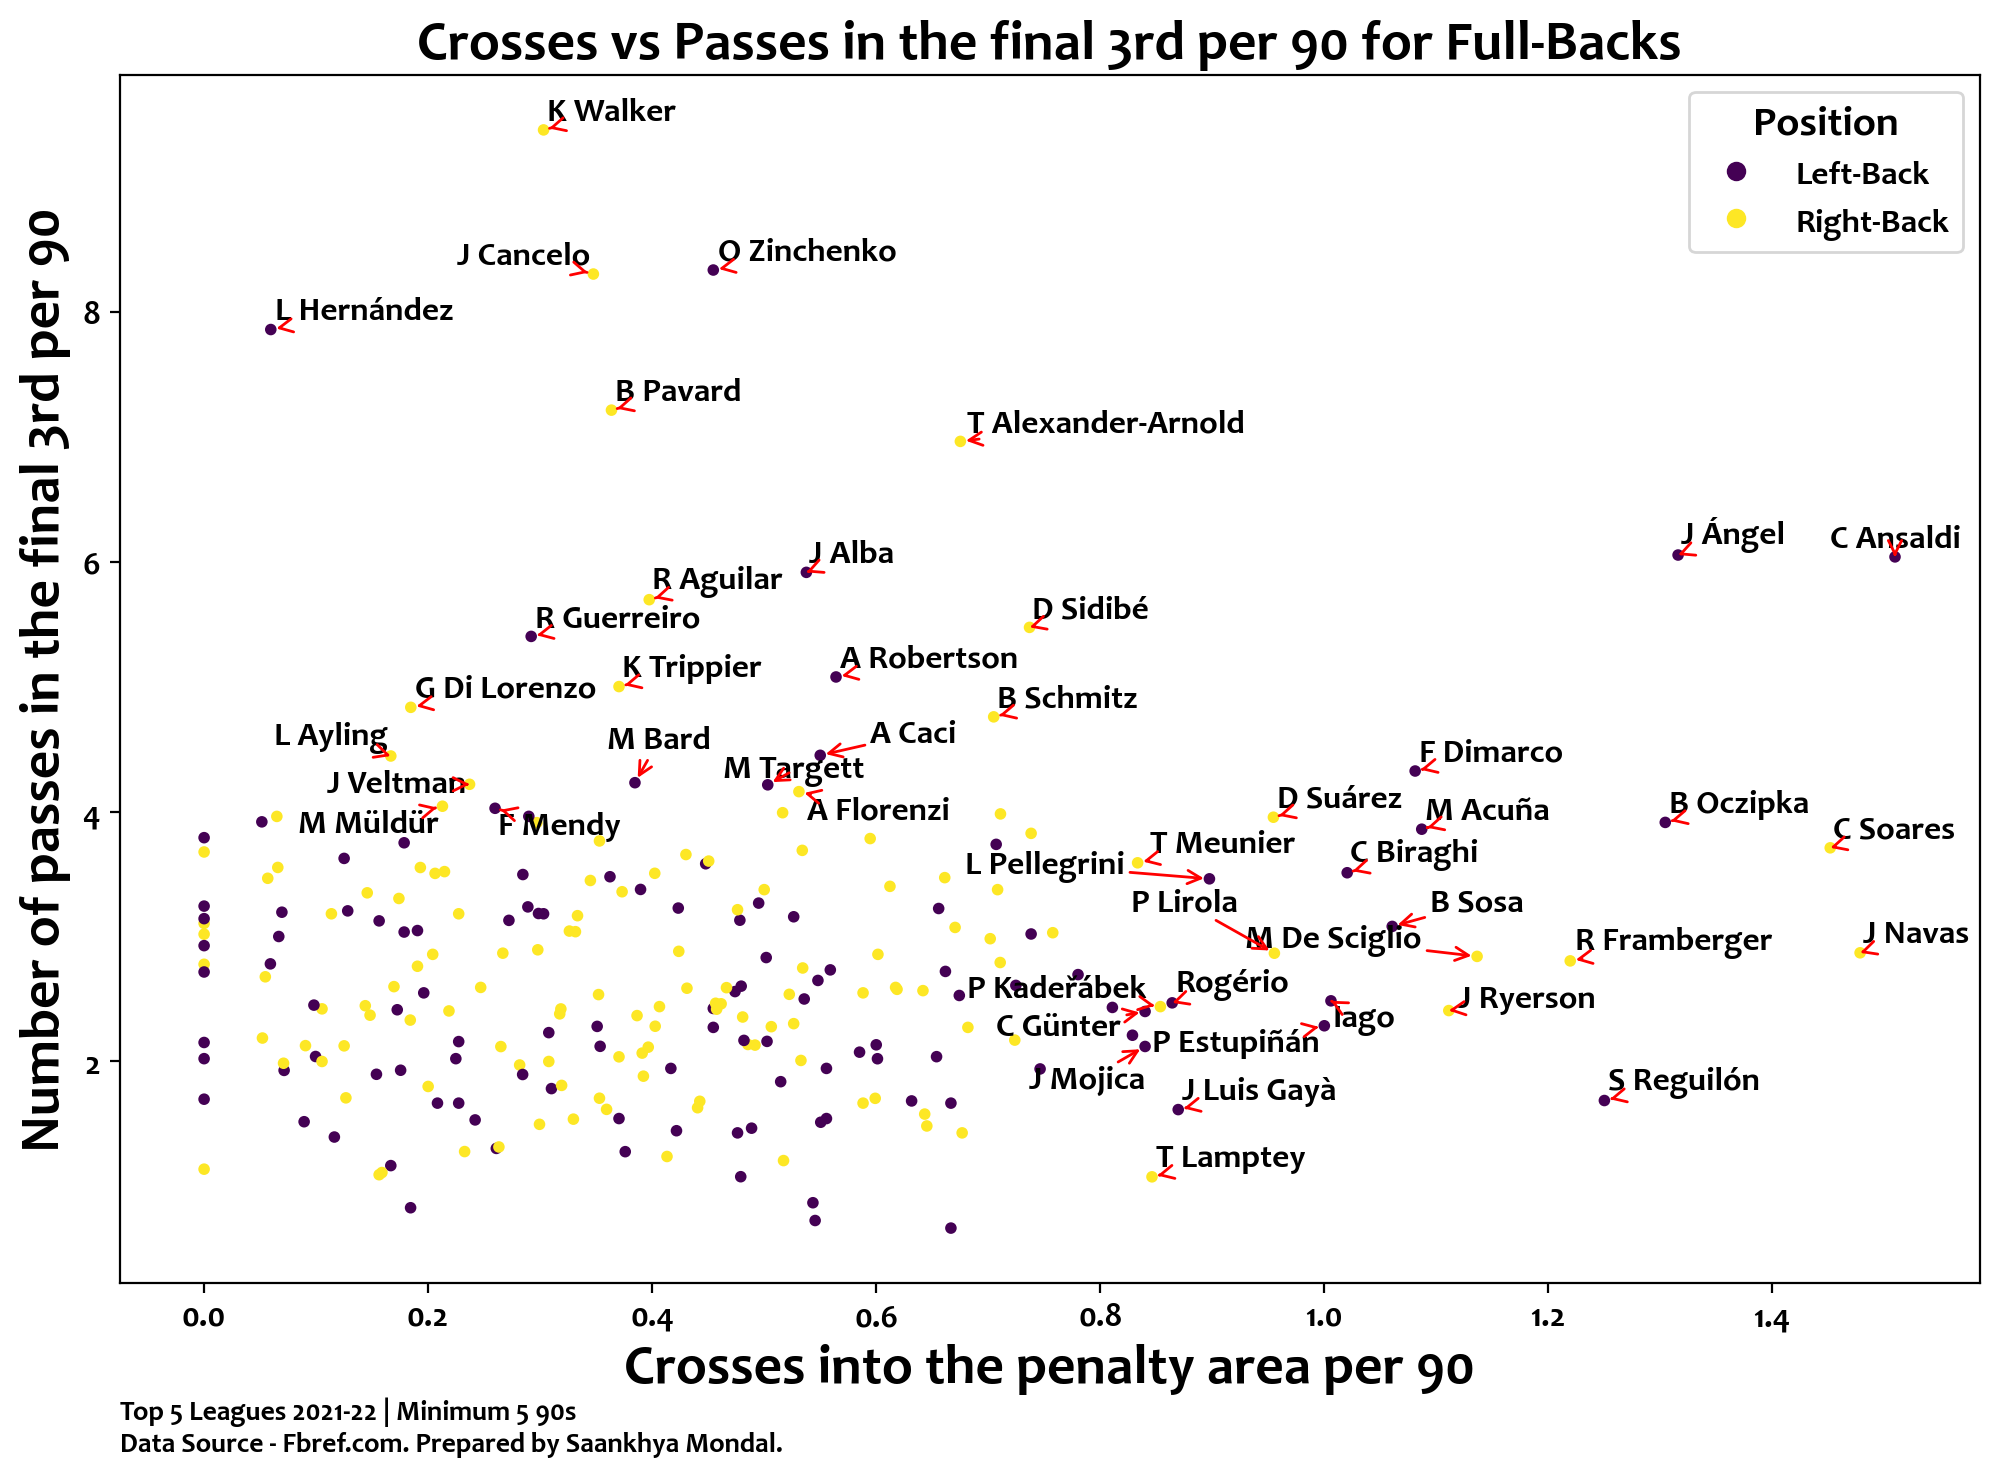

In [17]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data['1/3p90'] = data['1/3']/data['90s']
data['CrsPAp90'] = data['CrsPA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['1/3p90'].quantile(0.900)
outlier_bottom = data['1/3p90'].quantile(0.03)
outlier_right = data['CrsPAp90'].quantile(0.900)
outlier_left = data['CrsPAp90'].quantile(0.03)

par_x = list(data['CrsPAp90'].astype(float))
par_y = list(data['1/3p90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Crosses into the penalty area per 90', fontsize=20)
ax.set_ylabel('Number of passes in the final 3rd per 90', fontsize=20)
ax.set_title('Crosses vs Passes in the final 3rd per 90 for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [18]:
fig.savefig('Images/Crp90vs13p90_FB.png', dpi=400, bbox_inches='tight')

In [19]:
player_data

,S. No.,Player,Position,90s,Cmp,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,4,Yunis Abdelhamid,Centre-Back,23.1,921.0,6813.0,0.0,0.2,-0.2,6.0,57.0,4.0,0.0,58.0
1,7,Laurent Abergel,Defensive Midfield,23.2,944.0,4713.0,2.0,2.0,0.0,17.0,89.0,15.0,6.0,88.0
2,8,Charles Abi,Centre-Forward,0.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Matthis Abline,Centre-Forward,1.1,8.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,12,Tammy Abraham,Centre-Forward,25.5,392.0,1462.0,3.0,3.1,-0.1,28.0,27.0,22.0,3.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,2817,Kurt Zouma,Centre-Back,15.8,518.0,3111.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,23.0
1980,2818,Igor Zubeldia,Defensive Midfield,10.8,539.0,3098.0,1.0,0.0,1.0,0.0,31.0,1.0,0.0,16.0
1981,2820,Martín Zubimendi,Defensive Midfield,18.3,769.0,3653.0,1.0,0.4,0.6,9.0,67.0,7.0,1.0,61.0
1982,2822,Martin Ødegaard,Attacking Midfield,18.3,822.0,3262.0,3.0,4.2,-1.2,44.0,53.0,43.0,2.0,103.0


C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

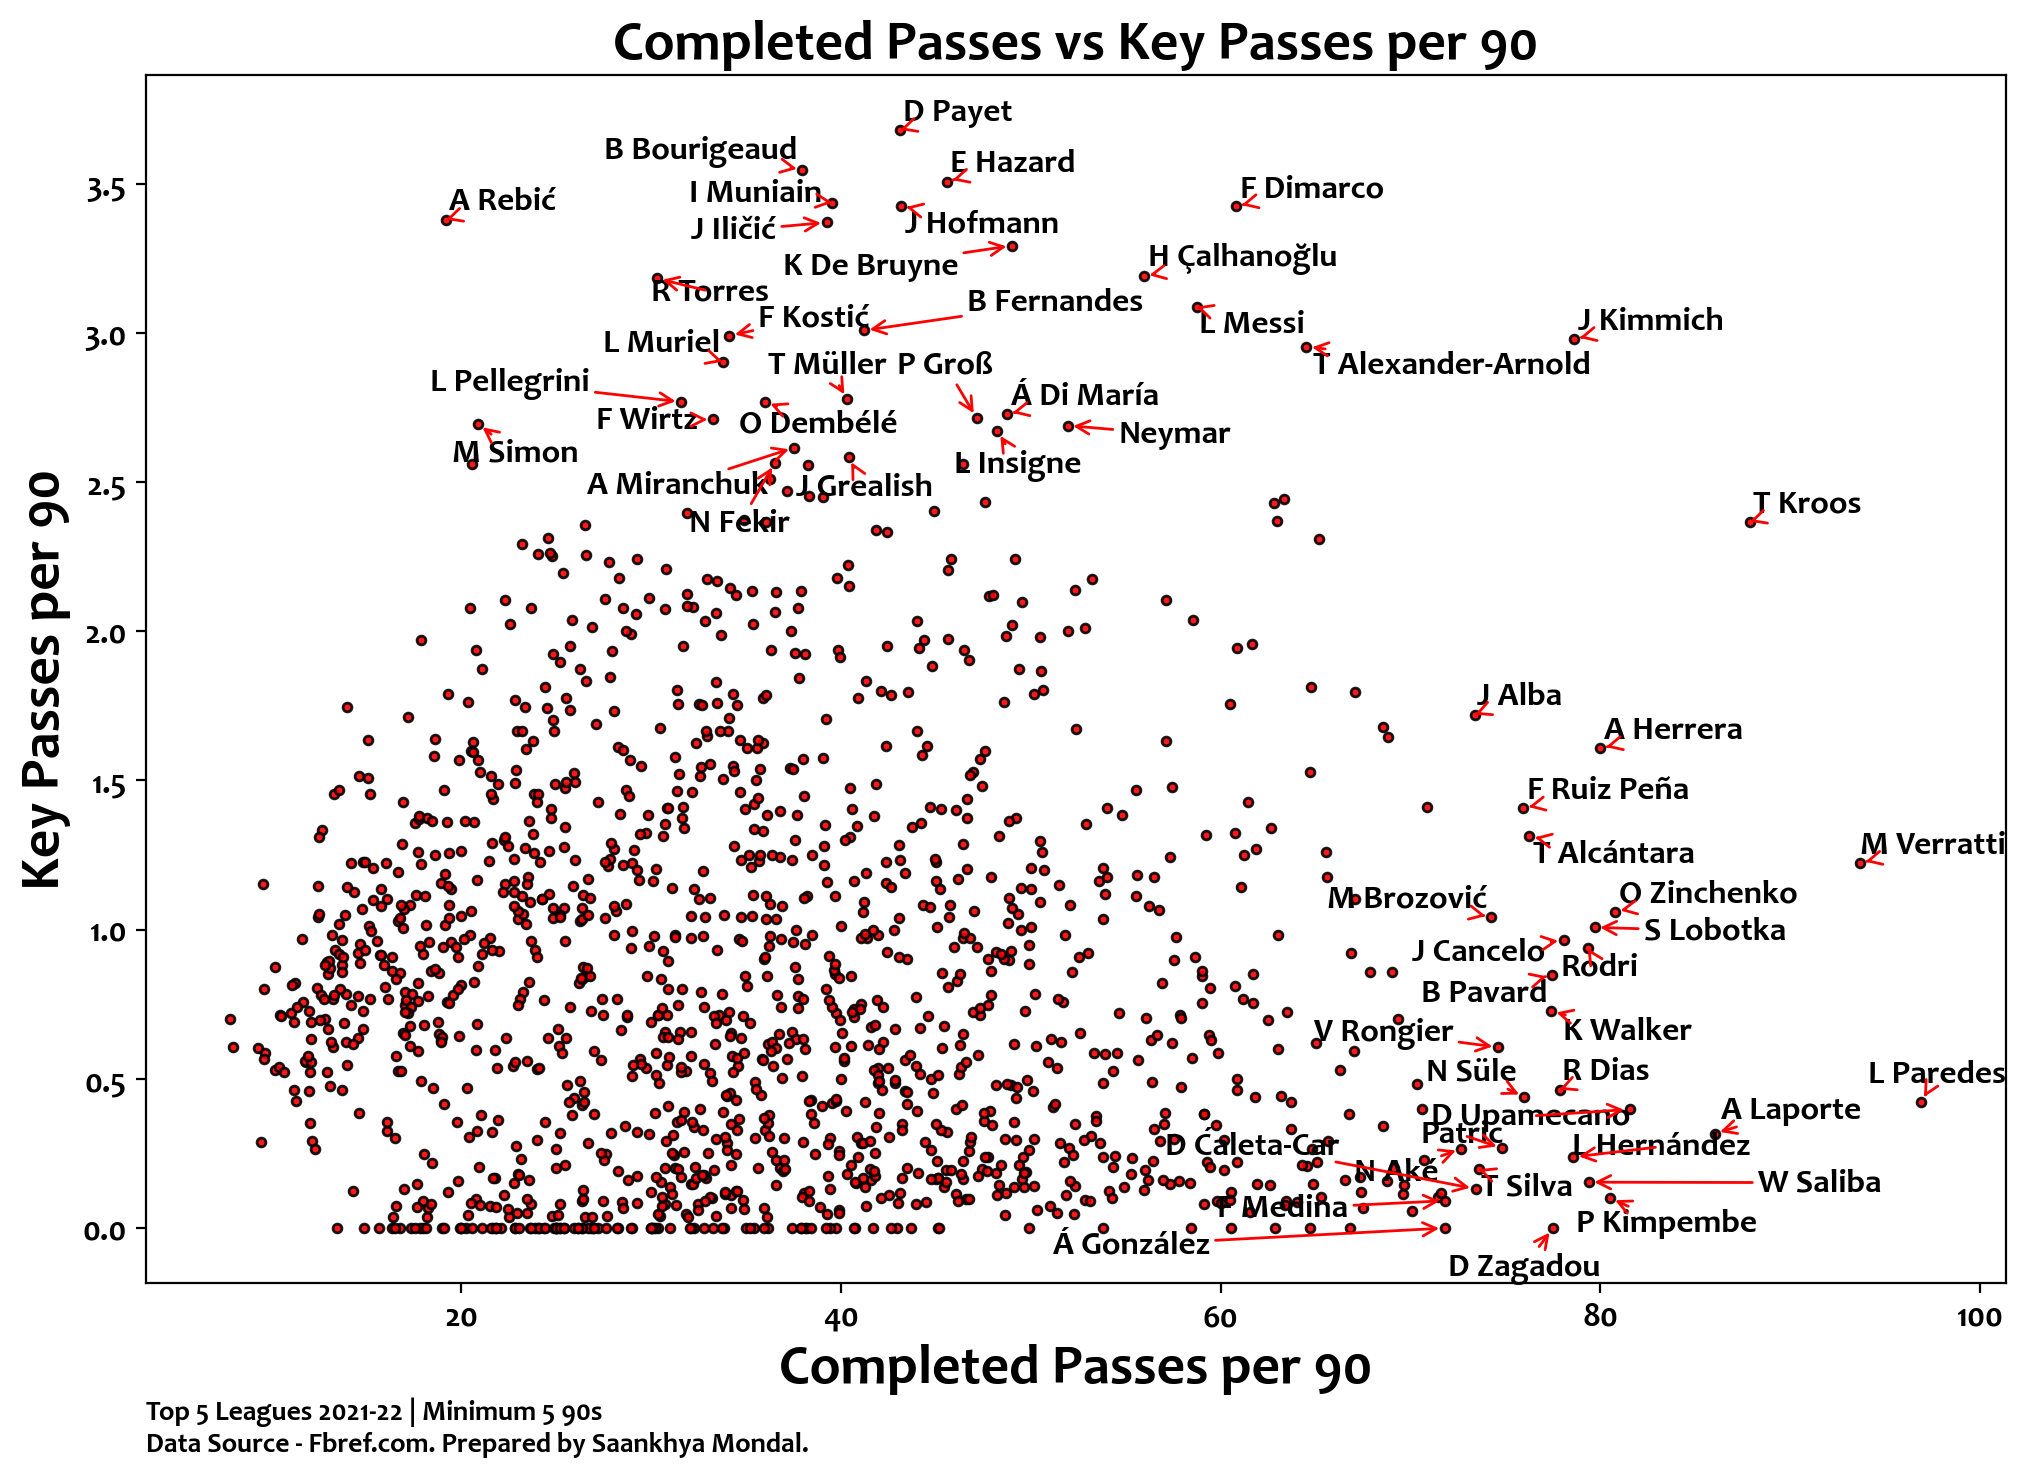

In [20]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['Cmpp90'] = data['Cmp']/data['90s']
data['KPp90'] = data['KP']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['KPp90'].quantile(0.980)
outlier_bottom = data['KPp90'].quantile(0.03)
outlier_right = data['Cmpp90'].quantile(0.980)
outlier_left = data['Cmpp90'].quantile(0.03)

par_x = list(data['Cmpp90'].astype(float))
par_y = list(data['KPp90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Completed Passes per 90', fontsize=20)
ax.set_ylabel('Key Passes per 90', fontsize=20)
ax.set_title('Completed Passes vs Key Passes per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

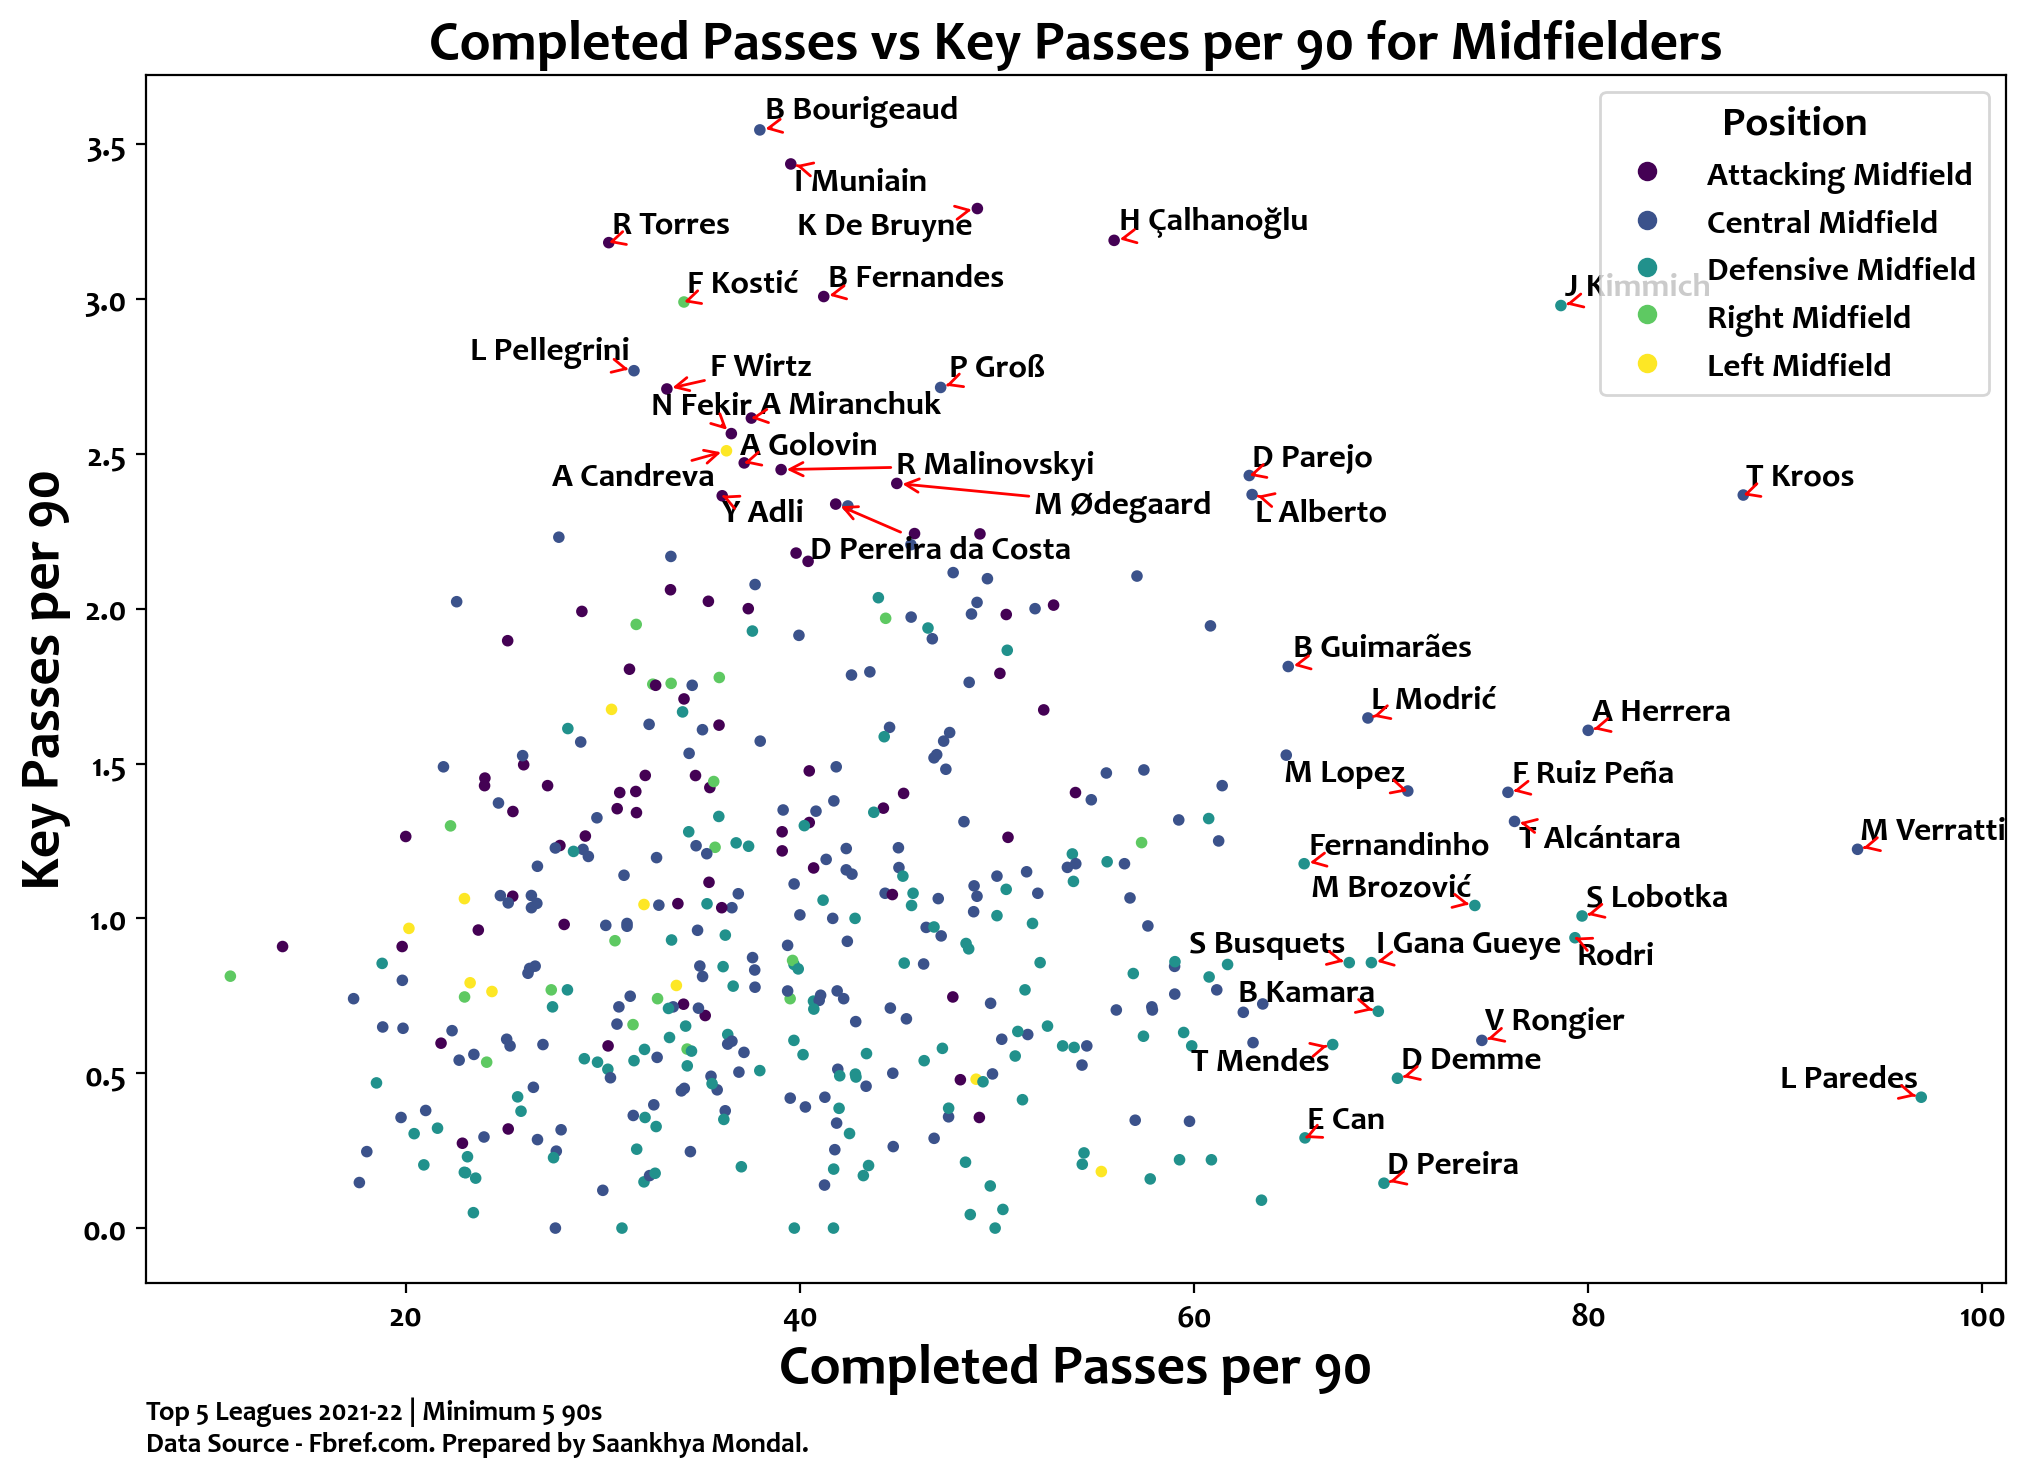

In [21]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Attacking Midfield', 'Central Midfield', 'Defensive Midfield', 'Right Midfield', 'Left Midfield']
data = data[data['Position'].apply(lambda x: x in who)]
data['Cmpp90'] = data['Cmp']/data['90s']
data['KPp90'] = data['KP']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['KPp90'].quantile(0.950)
outlier_bottom = data['KPp90'].quantile(0.03)
outlier_right = data['Cmpp90'].quantile(0.950)
outlier_left = data['Cmpp90'].quantile(0.03)

par_x = list(data['Cmpp90'].astype(float))
par_y = list(data['KPp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Completed Passes per 90', fontsize=20)
ax.set_ylabel('Key Passes per 90', fontsize=20)
ax.set_title('Completed Passes vs Key Passes per 90 for Midfielders', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

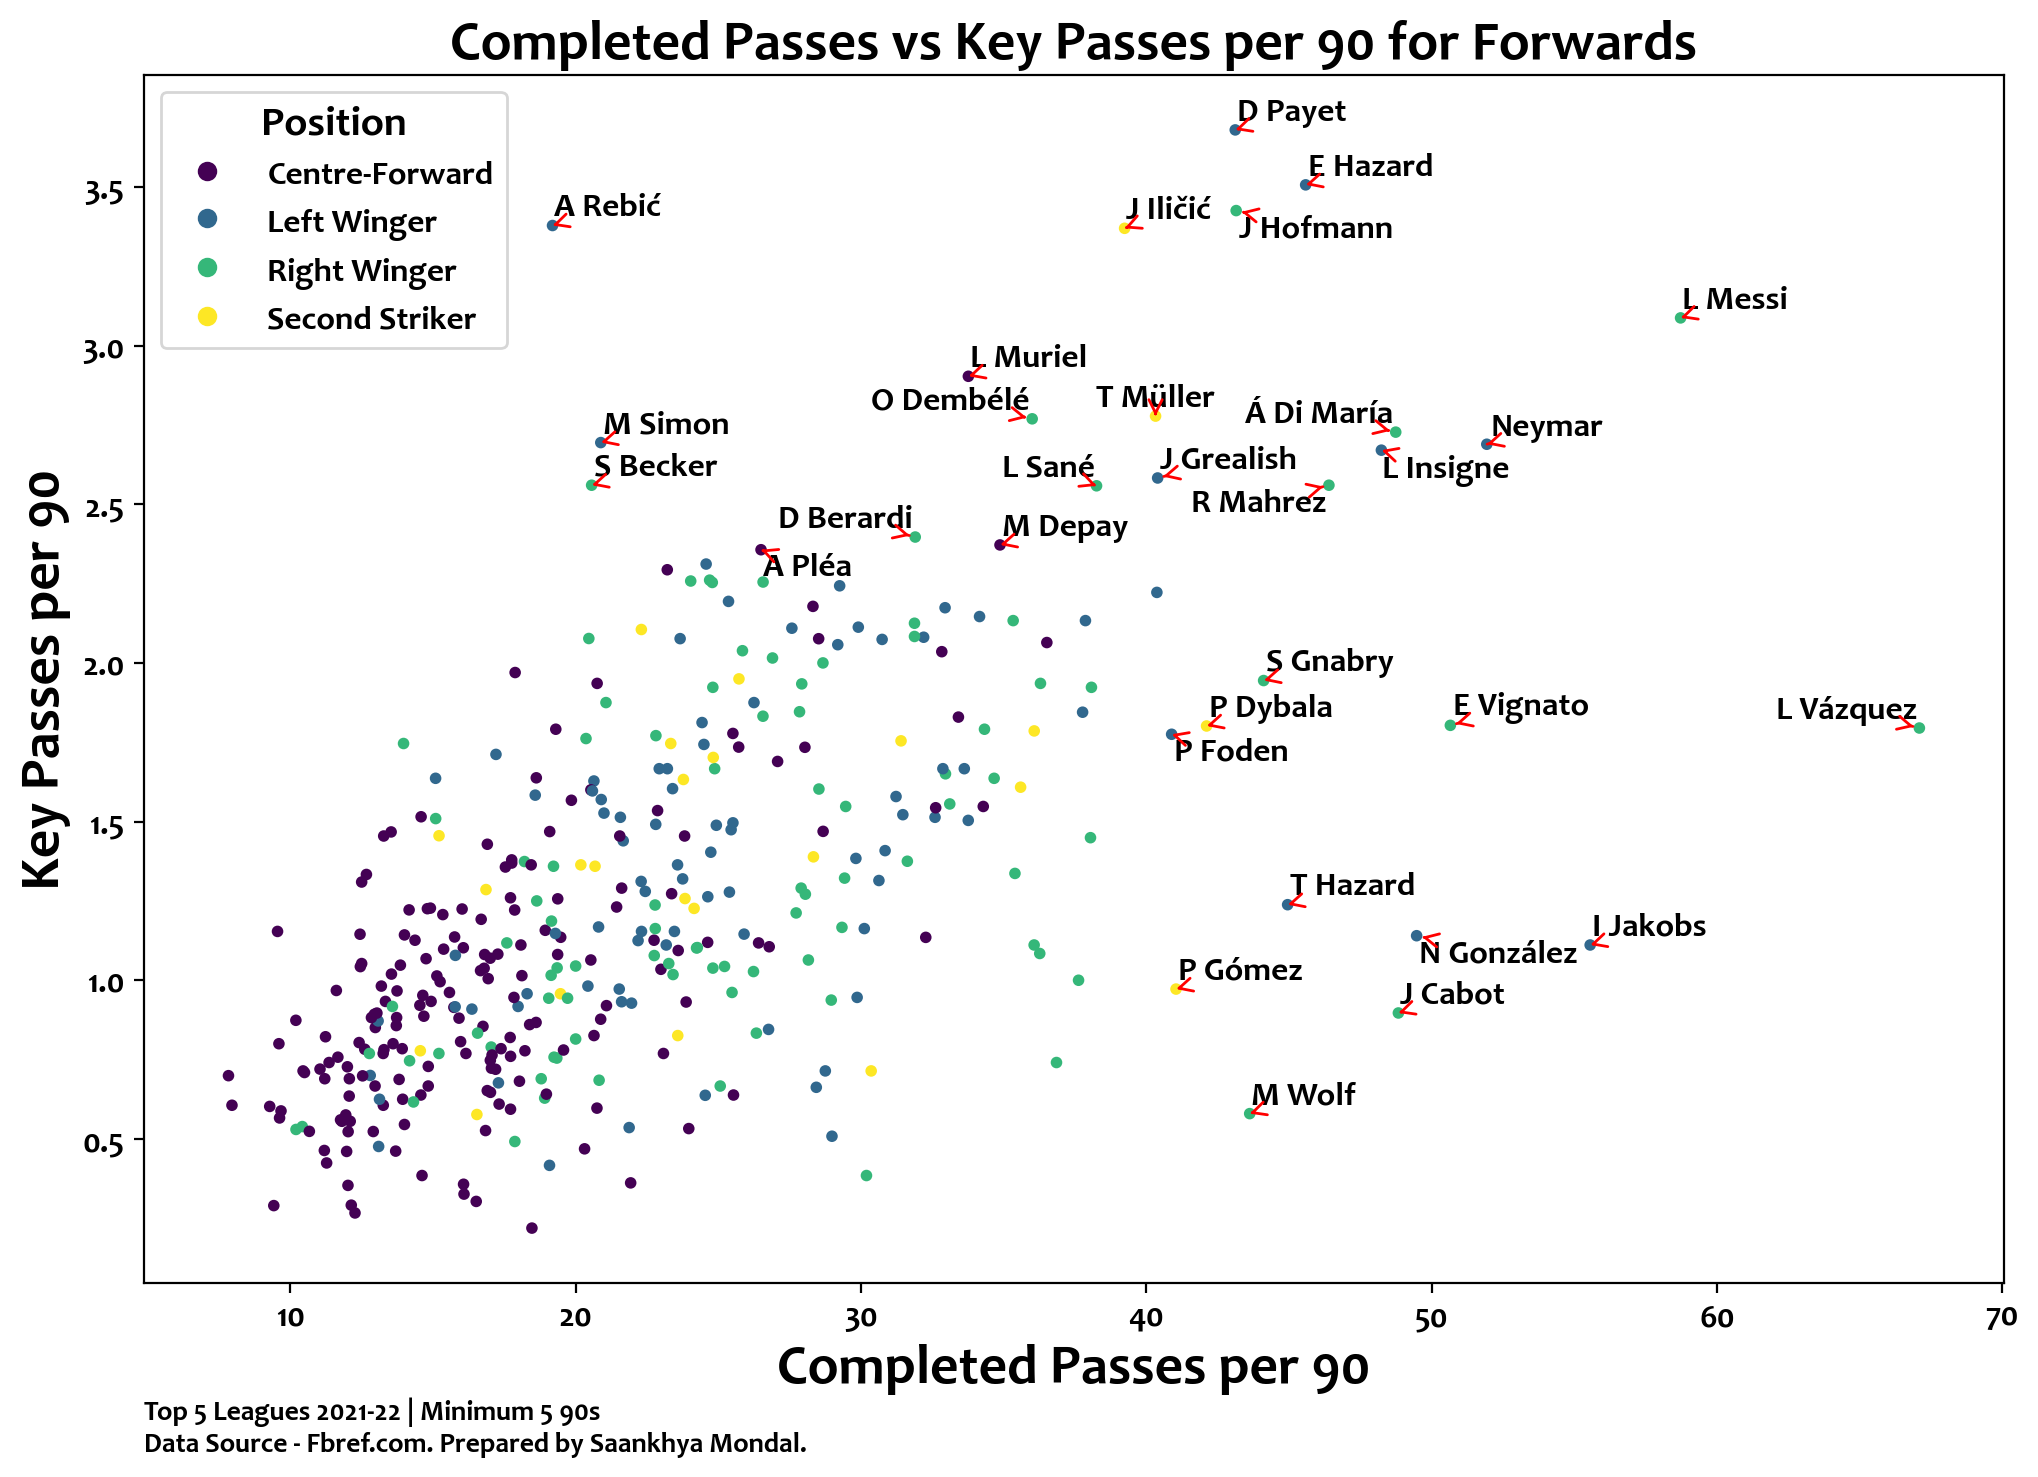

In [22]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Centre-Forward', 'Left Winger', 'Right Winger', 'Second Striker']
data = data[data['Position'].apply(lambda x: x in who)]
data['Cmpp90'] = data['Cmp']/data['90s']
data['KPp90'] = data['KP']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['KPp90'].quantile(0.950)
outlier_bottom = data['KPp90'].quantile(0.03)
outlier_right = data['Cmpp90'].quantile(0.950)
outlier_left = data['Cmpp90'].quantile(0.03)

par_x = list(data['Cmpp90'].astype(float))
par_y = list(data['KPp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Completed Passes per 90', fontsize=20)
ax.set_ylabel('Key Passes per 90', fontsize=20)
ax.set_title('Completed Passes vs Key Passes per 90 for Forwards', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

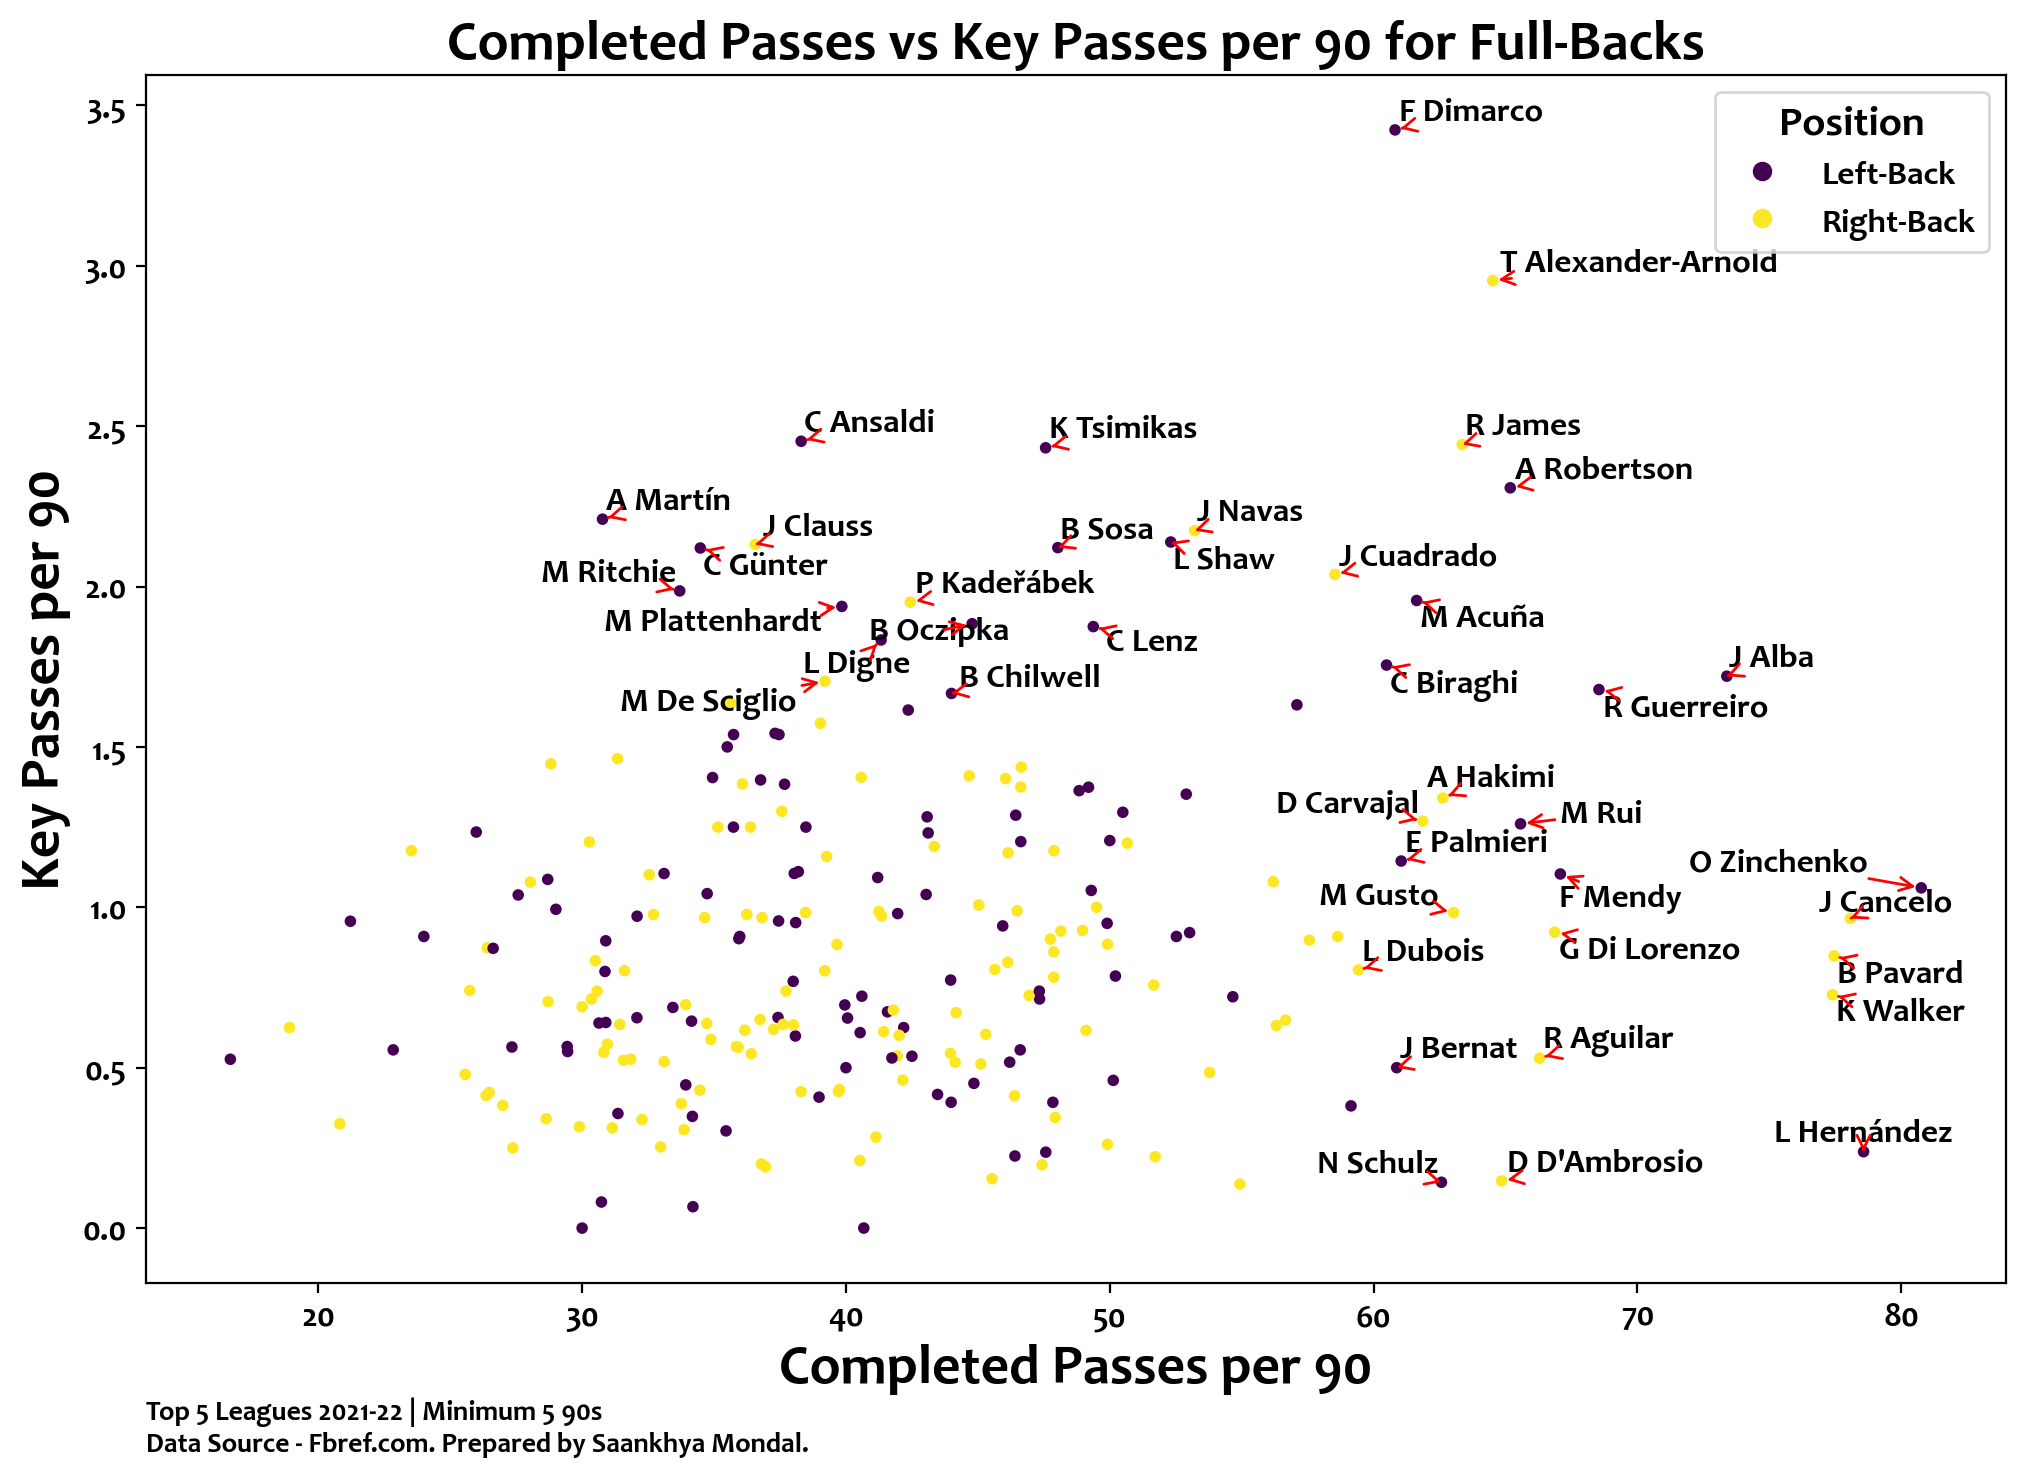

In [23]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data['Cmpp90'] = data['Cmp']/data['90s']
data['KPp90'] = data['KP']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['KPp90'].quantile(0.900)
outlier_bottom = data['KPp90'].quantile(0.03)
outlier_right = data['Cmpp90'].quantile(0.900)
outlier_left = data['Cmpp90'].quantile(0.03)

par_x = list(data['Cmpp90'].astype(float))
par_y = list(data['KPp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Completed Passes per 90', fontsize=20)
ax.set_ylabel('Key Passes per 90', fontsize=20)
ax.set_title('Completed Passes vs Key Passes per 90 for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [24]:
fig.savefig('Images/Cmpp90vsKPp90_FB.png', dpi=400, bbox_inches='tight')